# Stereographic Projection to 3D bloch sphere

## Package Import

In [1]:
import numpy as np
from PIL import Image
from qiskit.visualization import plot_bloch_vector

## Define Project Function

In [157]:
def project(img, h_img, w_img, h_proj, w_proj):

    (row, col, _) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    r = 3 * np.sqrt(x**2 + y**2) / 16
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q,r)
    return X

def get_2d_to_3d(point,r):
    [x, y, _] = point
    k = round(4*r / (x**2 + y**2 + 4*r**2), 4)
    print("r = ", r, " k = ", k)
    k_list.append(k)
    P = np.array([k * x, k * y, (1-2*k)*r ])
    return P

## Project 2D Pixel on Bloch Sphere

In [154]:
import os
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

### 1X1 Pixel

In [4]:
path_img_1 = 'pixel1x1.png'
path_img_1 = os.path.join(os.path.abspath(''),
                            path_img_1)
print(path_img_1)

c:\Users\HCI\Desktop\Stereo\pixel1x1.png


In [5]:
pix = np.array(Image.open(path_img_1))

h_img = pix.shape[0]
w_img = pix.shape[1]
h_proj_2 = 1
w_proj_2 = 1

x = 1.1

proj_1 = np.array([[x,x,0]])

point_2d = []
point_3d = []

for i in proj_1:
    sphere = project(i, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)

x,y,z =  1.1 1.1 0
k =  0.4227
point_2d =  [array([1.1, 1.1, 0. ])]
point_3d =  [array([0.46497001, 0.46497001, 0.04509397])]


[array([1.1, 1.1, 0. ])]


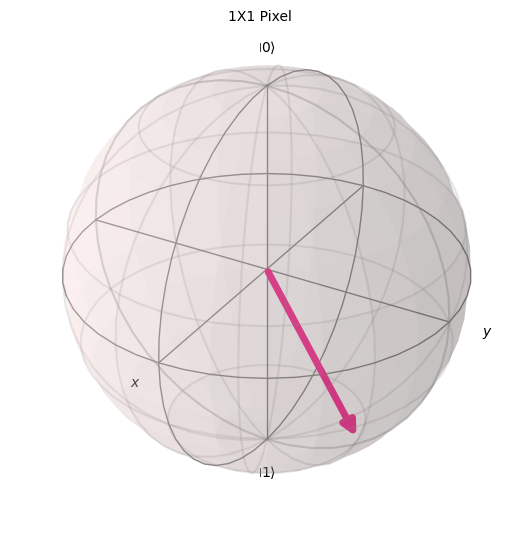

In [7]:
print(point_2d)
plot_bloch_vector(point_2d, title='1X1 Pixel')

point_3d =  [array([0.46497001, 0.46497001, 0.04509397])]


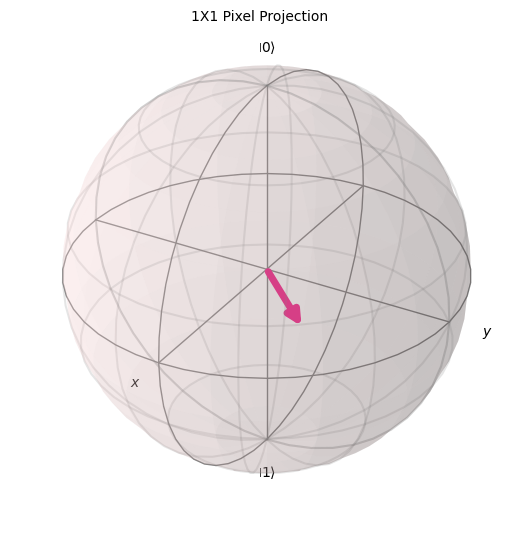

In [6]:
print('point_3d = ', point_3d)
plot_bloch_vector(point_3d, title='1X1 Pixel Projection')

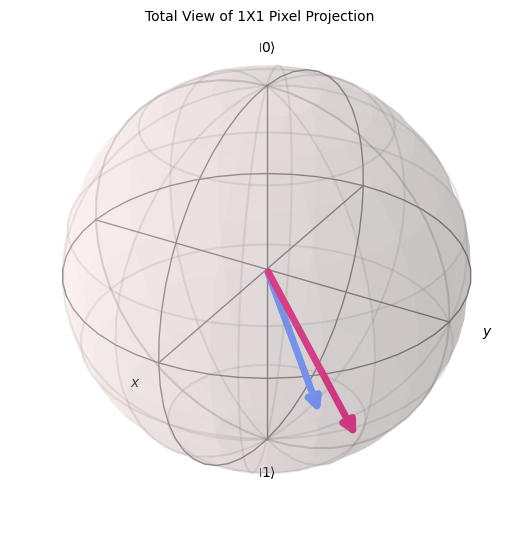

In [8]:
plot_bloch_vector(point_2d+point_3d, title='Total View of 1X1 Pixel Projection')

### 2X2 Pixel

In [155]:
path_img_2 = 'pixel2x2.png'
path_img_2 = os.path.join(os.path.abspath(''),
                            path_img_2)
print(path_img_2)

c:\Users\HCI\Desktop\Stereo\pixel2x2.png


In [159]:
pix = np.array(Image.open(path_img_2))

h_img = pix.shape[0]
w_img = pix.shape[1]
h_proj_2 = 2
w_proj_2 = 2

proj_2 = np.array([[0.5,0.5,0],
                 [-0.5,0.5,0],
                 [-0.5,-0.5,0],
                 [0.5,-0.5,0]])

point_2d = []
point_3d = []
k_list = []

for i in proj_2:
    sphere = project(i,h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)
    point_3d.append(sphere)
    
print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
print("k = ", k_list)

x,y,z =  0.5 0.5 0
r =  0.13258252147247768  k =  0.9299
x,y,z =  -0.5 0.5 0
r =  0.13258252147247768  k =  0.9299
x,y,z =  -0.5 -0.5 0
r =  0.13258252147247768  k =  0.9299
x,y,z =  0.5 -0.5 0
r =  0.13258252147247768  k =  0.9299
point_2d =  [array([0.5, 0.5, 0. ]), array([-0.5,  0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ])]
point_3d =  [array([ 0.46495   ,  0.46495   , -0.11399445]), array([-0.46495   ,  0.46495   , -0.11399445]), array([-0.46495   , -0.46495   , -0.11399445]), array([ 0.46495   , -0.46495   , -0.11399445])]
k =  [0.9299, 0.9299, 0.9299, 0.9299]


[array([0.5, 0.5, 0. ]), array([-0.5,  0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ])]


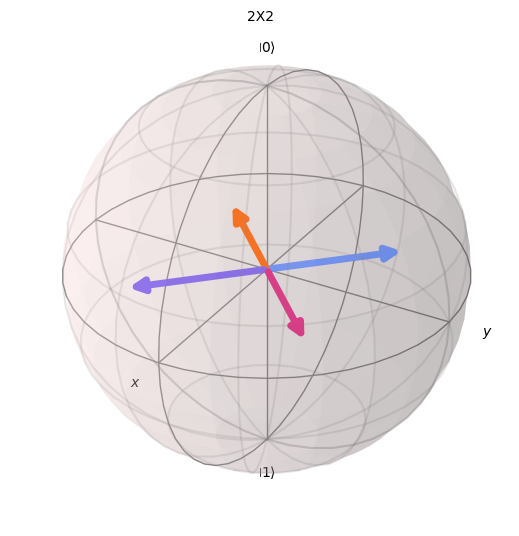

In [160]:
print(point_2d)
plot_bloch_vector(point_2d, title='2X2')

[array([ 0.46495   ,  0.46495   , -0.11399445]), array([-0.46495   ,  0.46495   , -0.11399445]), array([-0.46495   , -0.46495   , -0.11399445]), array([ 0.46495   , -0.46495   , -0.11399445])]


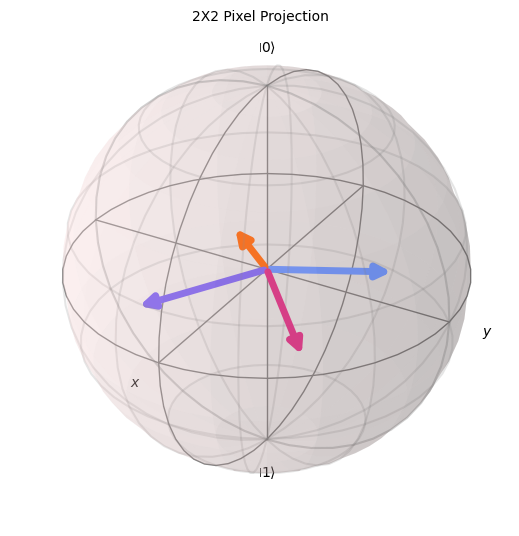

In [161]:
print(point_3d)
plot_bloch_vector(point_3d, title='2X2 Pixel Projection')

In [164]:
point_3d[0]

array([ 0.46495   ,  0.46495   , -0.11399445])

scaled_point_3d = [array([ 0.69671422,  0.69671422, -0.17081741]), array([-0.69671422,  0.69671422, -0.17081741]), array([-0.69671422, -0.69671422, -0.17081741]), array([ 0.69671422, -0.69671422, -0.17081741])]


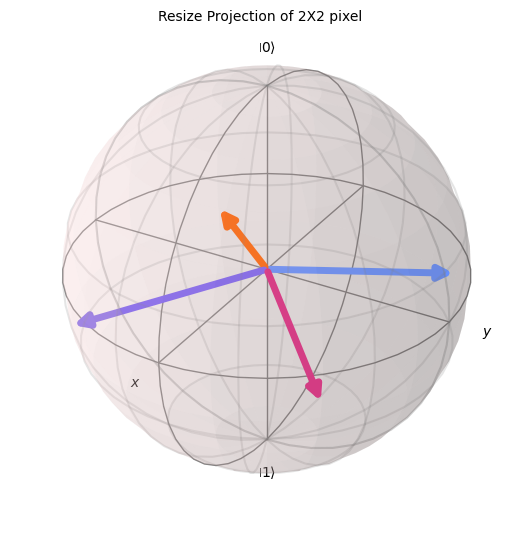

In [165]:
scaled_point_3d = []
size_list = []
for i in range(len(point_3d)):
    size = np.linalg.norm(point_3d[i])
    resize = point_3d[i]*(1/size)
    scaled_point_3d.append(resize)
    size_list.append(size)

print("scaled_point_3d =", scaled_point_3d)
plot_bloch_vector(scaled_point_3d, title='Resize Projection of 2X2 pixel')

In [166]:
size_list

[0.6673467914646215,
 0.6673467914646215,
 0.6673467914646215,
 0.6673467914646215]

[0.9299, 0.9299, 0.9299, 0.9299]
[0.9299, 0.9299, 0.9299, 0.9299]
[0.9299, 0.9299, 0.9299, 0.9299]
[0.9299, 0.9299, 0.9299, 0.9299]
backward_Q = [array([0.5, 0.5, 0. ]), array([-0.5,  0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ])]


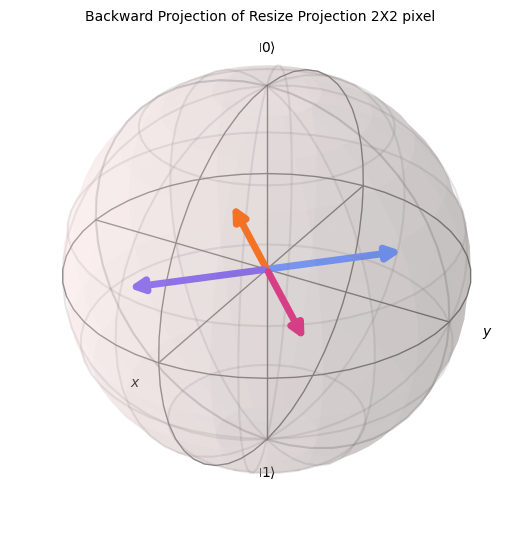

In [167]:
backward_Q = []
for i in range(len(point_3d)):
    backward = scaled_point_3d[i] * (size_list[i]) * (1/k_list[i])
    print(k_list)
    backward_Q.append(np.array([backward[0], backward[1], 0]))


print("backward_Q =", backward_Q)
plot_bloch_vector(backward_Q, title='Backward Projection of Resize Projection 2X2 pixel')

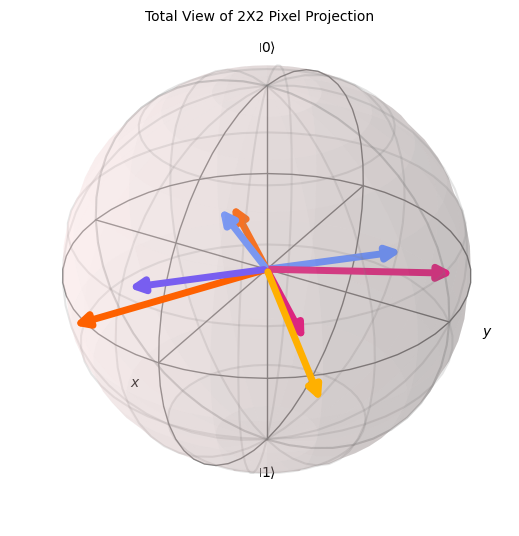

In [32]:
plot_bloch_vector(point_2d+list(scaled_point_3d), title='Total View of 2X2 Pixel Projection')

### 4X4 Pixel

In [58]:
path_img_4 = 'pixel4x4.png'
path_img_4 = os.path.join(os.path.abspath(''),
                            path_img_4)
print(path_img_4)

c:\Users\HCI\Desktop\Stereo\pixel4x4.png


In [104]:
def project(img, h_img, w_img, h_proj, w_proj):

    (row, col, _) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    r = 0.5
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q,r)
    return X

def get_2d_to_3d(point,r):
    [x, y, _] = point
    k = round(4*r / (x**2 + y**2 + 4*r**2), 4)
    print("r = ", r, " k = ", k)
    k_list.append(k)
    P = np.array([k * x, k * y, (1-2*k)*r ])
    return P

In [105]:
pix = np.array(Image.open(path_img_4))

h_img = pix.shape[0]
w_img = pix.shape[1]
h_proj_4 = 4
w_proj_4 = 4


pixel = np.array([[-1.5,1.5,0],[-0.5,1.5,0],[0.5,1.5,0],[1.5,1.5,0],
                  [-1.5,0.5,0],[-0.5,0.5,0],[0.5,0.5,0],[1.5,0.5,0],
                  [-1.5,-0.5,0],[-0.5,-0.5,0],[0.5,-0.5,0],[1.5,-0.5,0],
                  [-1.5,-1.5,0],[-0.5,-1.5,0],[0.5,-1.5,0],[1.5,-1.5,0]])

point_2d = []
point_3d = []
k_list = []

for i in pixel:
    sphere = project(i,h_img, w_img, h_proj_4, w_proj_4)
    point_2d.append(i)
    point_3d.append(sphere)
    
print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
print("k = ", k_list)

x,y,z =  -1.5 1.5 0
r =  0.5  k =  0.3636
x,y,z =  -0.5 1.5 0
r =  0.5  k =  0.5714
x,y,z =  0.5 1.5 0
r =  0.5  k =  0.5714
x,y,z =  1.5 1.5 0
r =  0.5  k =  0.3636
x,y,z =  -1.5 0.5 0
r =  0.5  k =  0.5714
x,y,z =  -0.5 0.5 0
r =  0.5  k =  1.3333
x,y,z =  0.5 0.5 0
r =  0.5  k =  1.3333
x,y,z =  1.5 0.5 0
r =  0.5  k =  0.5714
x,y,z =  -1.5 -0.5 0
r =  0.5  k =  0.5714
x,y,z =  -0.5 -0.5 0
r =  0.5  k =  1.3333
x,y,z =  0.5 -0.5 0
r =  0.5  k =  1.3333
x,y,z =  1.5 -0.5 0
r =  0.5  k =  0.5714
x,y,z =  -1.5 -1.5 0
r =  0.5  k =  0.3636
x,y,z =  -0.5 -1.5 0
r =  0.5  k =  0.5714
x,y,z =  0.5 -1.5 0
r =  0.5  k =  0.5714
x,y,z =  1.5 -1.5 0
r =  0.5  k =  0.3636
point_2d =  [array([-1.5,  1.5,  0. ]), array([-0.5,  1.5,  0. ]), array([0.5, 1.5, 0. ]), array([1.5, 1.5, 0. ]), array([-1.5,  0.5,  0. ]), array([-0.5,  0.5,  0. ]), array([0.5, 0.5, 0. ]), array([1.5, 0.5, 0. ]), array([-1.5, -0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ]), array([ 1.5, -0.5,  0. ]), arr

point_2d =  [array([-1.5,  1.5,  0. ]), array([-0.5,  1.5,  0. ]), array([0.5, 1.5, 0. ]), array([1.5, 1.5, 0. ]), array([-1.5,  0.5,  0. ]), array([-0.5,  0.5,  0. ]), array([0.5, 0.5, 0. ]), array([1.5, 0.5, 0. ]), array([-1.5, -0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ]), array([ 1.5, -0.5,  0. ]), array([-1.5, -1.5,  0. ]), array([-0.5, -1.5,  0. ]), array([ 0.5, -1.5,  0. ]), array([ 1.5, -1.5,  0. ])]


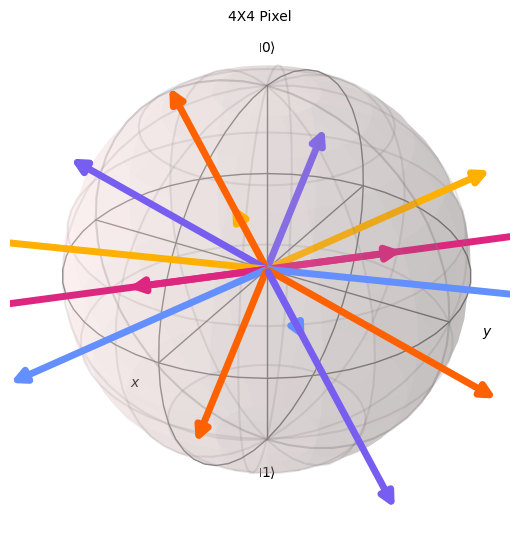

In [106]:
print('point_2d = ', point_2d)
plot_bloch_vector(point_2d, title='4X4 Pixel')

point_3d =  [array([-0.5454,  0.5454,  0.1364]), array([-0.2857,  0.8571, -0.0714]), array([ 0.2857,  0.8571, -0.0714]), array([0.5454, 0.5454, 0.1364]), array([-0.8571,  0.2857, -0.0714]), array([-0.66665,  0.66665, -0.8333 ]), array([ 0.66665,  0.66665, -0.8333 ]), array([ 0.8571,  0.2857, -0.0714]), array([-0.8571, -0.2857, -0.0714]), array([-0.66665, -0.66665, -0.8333 ]), array([ 0.66665, -0.66665, -0.8333 ]), array([ 0.8571, -0.2857, -0.0714]), array([-0.5454, -0.5454,  0.1364]), array([-0.2857, -0.8571, -0.0714]), array([ 0.2857, -0.8571, -0.0714]), array([ 0.5454, -0.5454,  0.1364])]


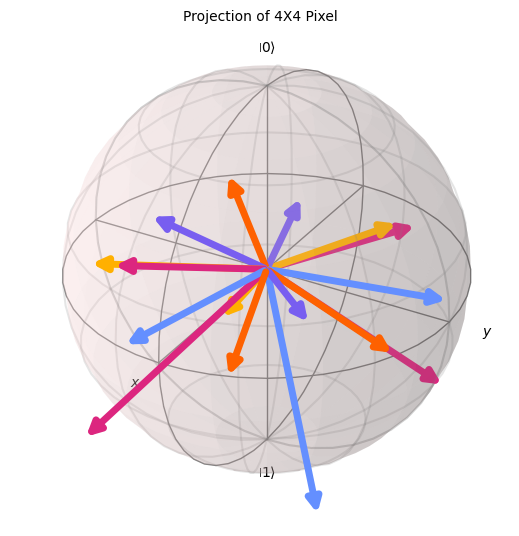

In [112]:
print('point_3d = ', point_3d)
plot_bloch_vector(point_3d, title='Projection of 4X4 Pixel')

scaled_point_3d = [array([-0.69630288,  0.69630288,  0.17413956]), array([-0.31524485,  0.94573454, -0.07878363]), array([ 0.31524485,  0.94573454, -0.07878363]), array([0.69630288, 0.69630288, 0.17413956]), array([-0.94573454,  0.31524485, -0.07878363]), array([-0.52981643,  0.52981643, -0.6622606 ]), array([ 0.52981643,  0.52981643, -0.6622606 ]), array([ 0.94573454,  0.31524485, -0.07878363]), array([-0.94573454, -0.31524485, -0.07878363]), array([-0.52981643, -0.52981643, -0.6622606 ]), array([ 0.52981643, -0.52981643, -0.6622606 ]), array([ 0.94573454, -0.31524485, -0.07878363]), array([-0.69630288, -0.69630288,  0.17413956]), array([-0.31524485, -0.94573454, -0.07878363]), array([ 0.31524485, -0.94573454, -0.07878363]), array([ 0.69630288, -0.69630288,  0.17413956])]


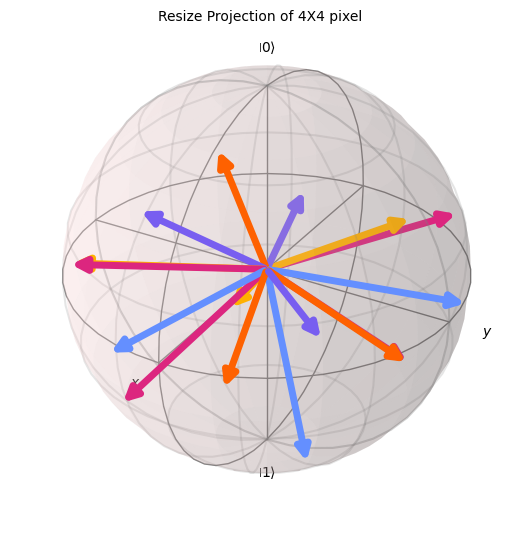

In [113]:
scaled_point_3d = []
size_list = []
for i in range(len(point_3d)):
    size = np.linalg.norm(point_3d[i])
    resize = point_3d[i]*(1/size)
    scaled_point_3d.append(resize)
    size_list.append(size)

print("scaled_point_3d =", scaled_point_3d)
plot_bloch_vector(scaled_point_3d, title='Resize Projection of 4X4 pixel')

In [109]:
size_list

[0.7832798222857525,
 0.9062796808932659,
 0.9062796808932659,
 0.7832798222857525,
 0.9062796808932659,
 1.2582660032759367,
 1.2582660032759367,
 0.9062796808932659,
 0.9062796808932659,
 1.2582660032759367,
 1.2582660032759367,
 0.9062796808932659,
 0.7832798222857525,
 0.9062796808932659,
 0.9062796808932659,
 0.7832798222857525]

In [110]:
scaled_point_3d[0] * (size_list[0]) * (1/k_list[0])

array([-1.5       ,  1.5       ,  0.37513751])

backward_Q = [array([-1.5,  1.5,  0. ]), array([-0.5,  1.5,  0. ]), array([0.5, 1.5, 0. ]), array([1.5, 1.5, 0. ]), array([-1.5,  0.5,  0. ]), array([-0.5,  0.5,  0. ]), array([0.5, 0.5, 0. ]), array([1.5, 0.5, 0. ]), array([-1.5, -0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ]), array([ 1.5, -0.5,  0. ]), array([-1.5, -1.5,  0. ]), array([-0.5, -1.5,  0. ]), array([ 0.5, -1.5,  0. ]), array([ 1.5, -1.5,  0. ])]


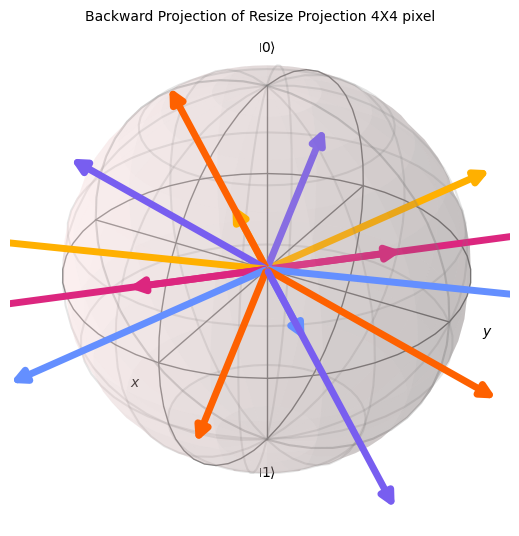

In [114]:
backward_Q = []
for i in range(len(point_3d)):
    backward = scaled_point_3d[i] * (size_list[i]) * (1/k_list[i])
    backward_Q.append(np.array([backward[0], backward[1], 0]))


print("backward_Q =", backward_Q)
plot_bloch_vector(backward_Q, title='Backward Projection of Resize Projection 4X4 pixel')

## Pixel Re-projection

### 1x1 Pixel Re-projection

#### Prepare Pixel

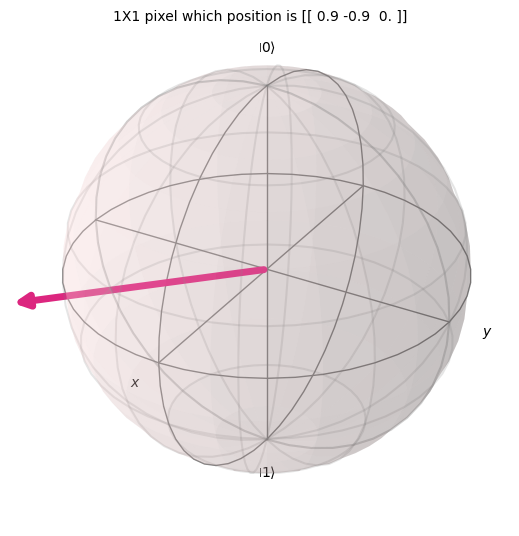

In [86]:
Q = np.array([[0.9,-0.9,0]])

plot_bloch_vector(Q, title = f'1X1 pixel which position is {Q}')

#### Project Pixel

In [87]:
h_img = Q.shape[0]
w_img = Q.shape[1]
h_proj = 1
w_proj = 1

point_2d = []
point_3d = []

for i in Q:
    P = project(i, h_img, w_img, h_proj, w_proj)
    point_2d.append(i)    
    point_3d.append(P)

x,y,z =  0.9 -0.9 0
k =  0.7117


point_2d =  [array([ 0.9, -0.9,  0. ])]
point_3d =  [array([ 0.64052998, -0.64052998, -0.4234    ])]


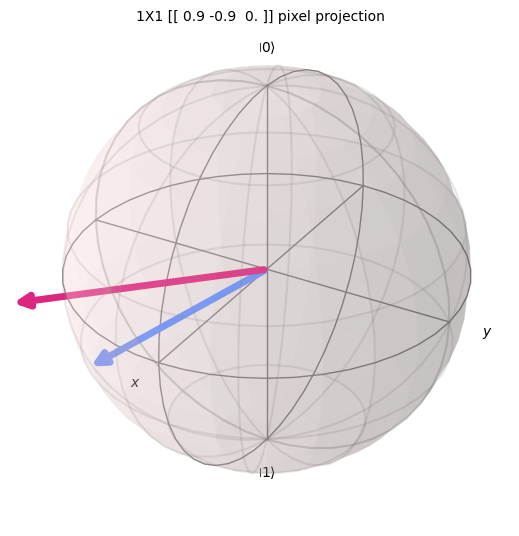

In [88]:
print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
plot_bloch_vector(point_2d+point_3d, title = f'1X1 {Q} pixel projection')

#### Re-project projected pixel 

[ 0.89999998 -0.89999998  0.        ]


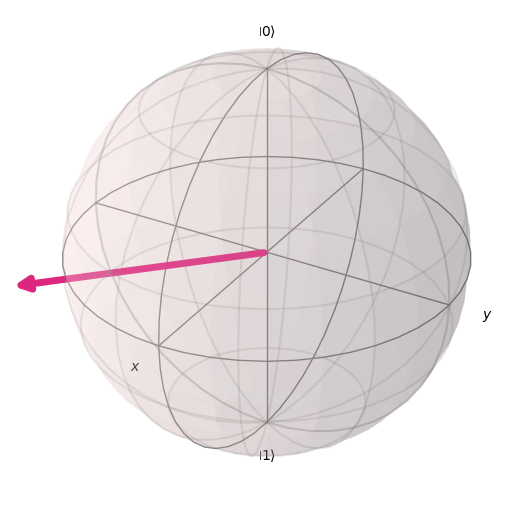

In [89]:
k = round( 4 /(Q[0][0]**2 + Q[0][1]**2 + 4),4)
Q_re = np.array([P[0]/k,P[1]/k, 0])
print(Q_re)
plot_bloch_vector(Q_re)

x,y,z =  0.899999976158142 -0.899999976158142 0
k =  0.7117


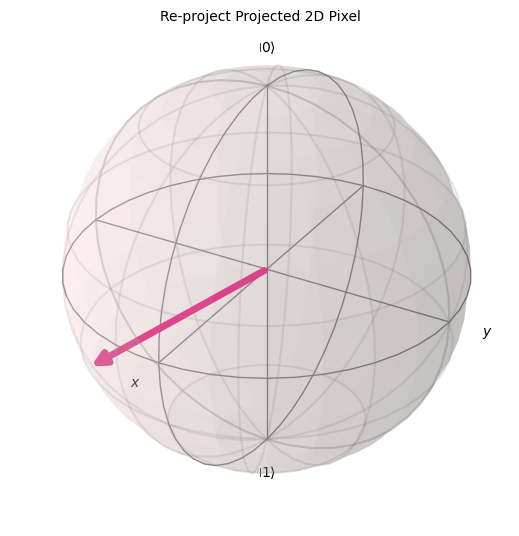

In [90]:
# Project Re-projected point

Q_re_re = project(Q_re, 1, 1, 1, 1)

plot_bloch_vector(Q_re_re, title='Re-project Projected 2D Pixel')

## Project a pixel using QuantumCircuit

### 1X1 Pixel

In [4]:
from math import pi
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

In [92]:
Q = np.array([1.1,1.1,0]) # 2D pixel coordinate

# Project 2D pixel on Bloch Sphere

P = project(Q,1,1,1,1)

x,y,z =  1.1 1.1 0
k =  0.6231


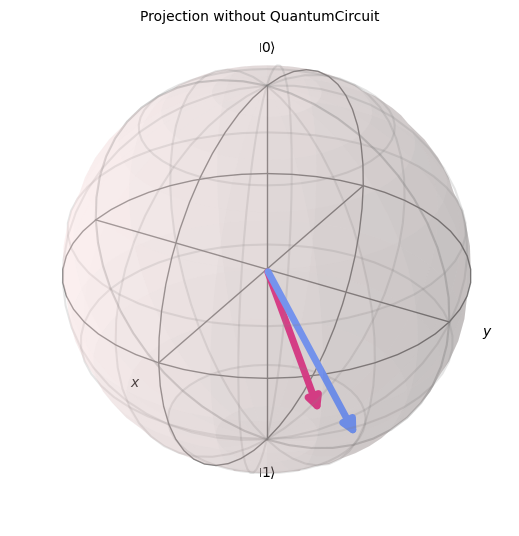

In [93]:
plot_bloch_vector([P]+[Q], title = 'Projection without QuantumCircuit')

### Prepare 2D Pixel with QuantumCircuit

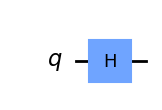

In [94]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

phi =  0.7853981633974483


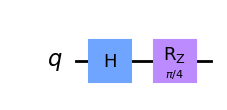

In [95]:
phi = np.arctan2(Q[1],Q[0])

print("phi = ", phi)

qc.rz(phi,0)
qc.draw('mpl')

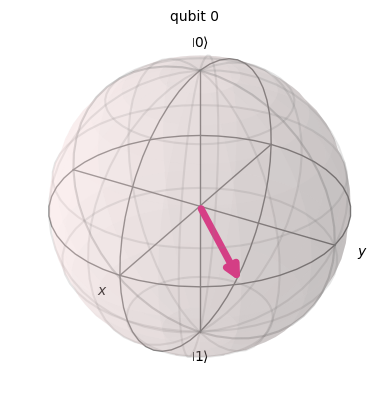

In [96]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

##### Analyze the state that passed through the Quantum Gates

In [51]:
from numpy import sqrt, arccos
print(state)

# Rz = np.array([[e^(-i*phi/2),0],
#                [0, e^(i*phi/2)])
# H = 1 / sqrt(2) np.array([[1,1],
#                          [1,-1]])
# 1/sqrt(2) * cos(phi/2) = 0.65328148

x = 2 * arccos(sqrt(2)*0.65328148)
print(x * 180 / pi) # radian to pi

Statevector([0.65328148-0.27059805j, 0.65328148+0.27059805j],
            dims=(2,))
45.00000103251222


### 2D pixel과 project 시킨 pixel 사이의 각도 $\theta$ 를 구해서 Gate에 대입

x,y,z =  1.1 1.1 0
k =  0.6231
P =  [ 0.68541001  0.68541001 -0.2462    ]


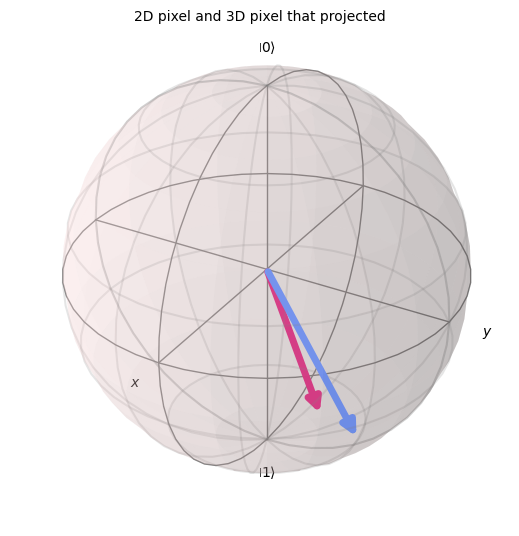

In [97]:
P = project(Q,1,1,1,1)
print("P = ", P)
plot_bloch_vector([P]+[Q], "2D pixel and 3D pixel that projected")

k =  0.6231 Inner =  1.5079020326828956
theta =  0.24836293810493312


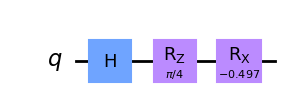

In [98]:
x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
Inner = Q.dot(P)
print("k = ", k, "Inner = ", Inner)
theta =  np.arccos(Inner / (np.sqrt((x**2 + y**2))))

print("theta = ", theta)
if P[2] > 0:
    qc.rx(2*theta, 0)
else:
    qc.rx(-2*theta, 0)
qc.draw('mpl')

Statevector([0.56671856-0.10170706j, 0.69975401+0.42288305j],
            dims=(2,))


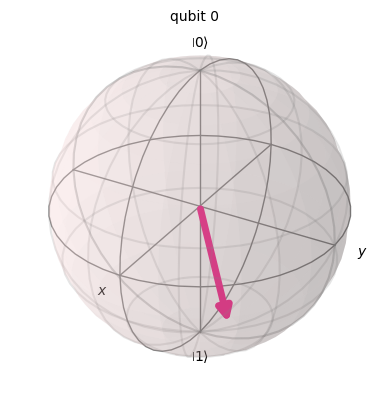

In [99]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

In [100]:
# QuantumCircuit의 Quantum gate를 지난 state의 theta 검산
from numpy import cos
from numpy import arccos
print(state)
m = 0
for i in range(2):
    m += state[i]
print(m)
theta_quantum = 2 * arccos(np.real(m)/ (np.sqrt(2) * cos(phi/2)))
print(theta_quantum)

Statevector([0.56671856-0.10170706j, 0.69975401+0.42288305j],
            dims=(2,))
(1.266472568207175+0.32117598784042034j)
0.49672587620986713


### Backward Projection with QuantumCircuit

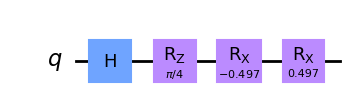

In [101]:
if P[2] > 0:
    qc.rx(-2*theta, 0)
else:
    qc.rx(+2*theta, 0)
qc.draw('mpl')

Statevector([0.65328148-0.27059805j, 0.65328148+0.27059805j],
            dims=(2,))


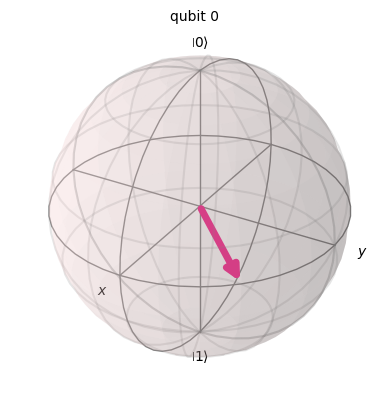

In [102]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

In [103]:
if P[2] > 0:
    plot_bloch_vector([1,np.pi/2-theta_quantum,phi], coord_type = 'spherical')
elif P[2] < 0:
    plot_bloch_vector([1,np.pi/2+theta_quantum,phi], coord_type = 'spherical')
else:
    plot_bloch_vector([1,np.pi/2,phi], coord_type = 'spherical')

## Compose QuantumCircuit that translated 2D image

In [5]:
from qiskit import QuantumCircuit, QuantumRegister

-0.7853981633974483


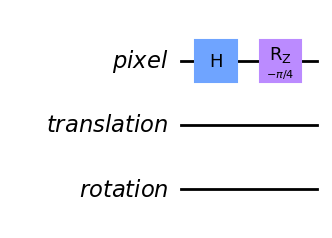

In [104]:
Q = np.array([2,-2,0]) # Given Pixel Coordinate

phi = np.arctan2(Q[1],Q[0])
print(phi)
pixel = QuantumRegister(size=1, name='pixel')
translation = QuantumRegister(size=1, name='translation')
rotation = QuantumRegister(size=1, name = 'rotation')

qc_t = QuantumCircuit(pixel,translation, rotation)
qc_t.h(0)
qc_t.rz(phi,0)
qc_t.draw('mpl')

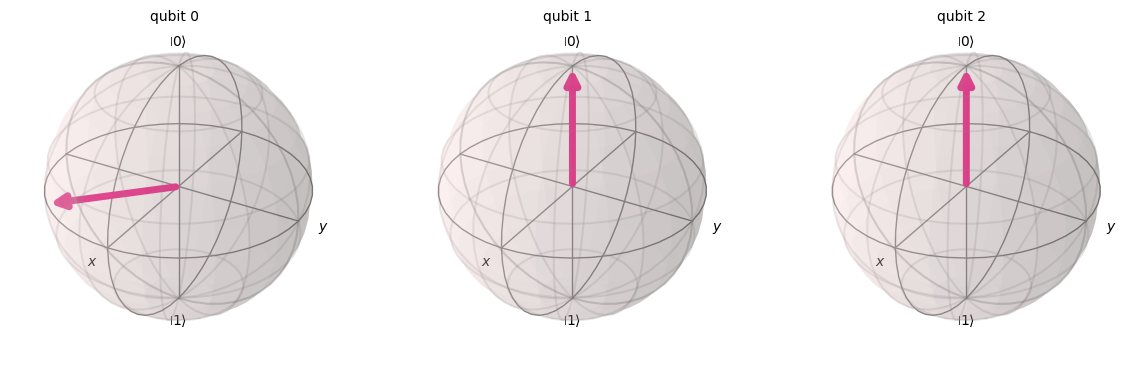

In [105]:
state = Statevector.from_instruction(qc_t)
plot_bloch_multivector(state)

x,y,z =  2 -2 0
k =  0.3333
P =  [ 0.6666 -0.6666  0.3334]
Inner =  2.6664
theta =  0.34011963912369564


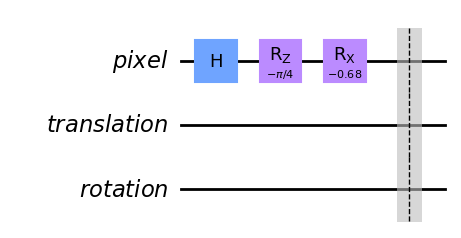

In [106]:
x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
P = project(Q,1,1,1,1)
print("P = ", P)
Inner = Q.dot(P)
print("Inner = ", Inner)
theta =  np.arccos(Inner / (np.sqrt((x**2 + y**2))))
print("theta = ", theta)

if P[2] > 0:
    qc_t.rx(-2*theta, 0)
else:
    qc_t.rx(+2*theta, 0)

qc_t.barrier()
qc_t.draw('mpl')

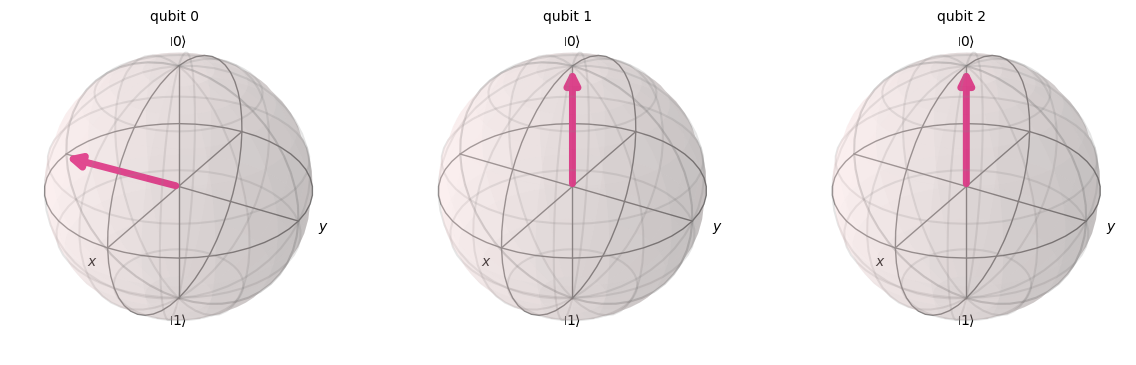

In [107]:
state = Statevector.from_instruction(qc_t)
plot_bloch_multivector(state)

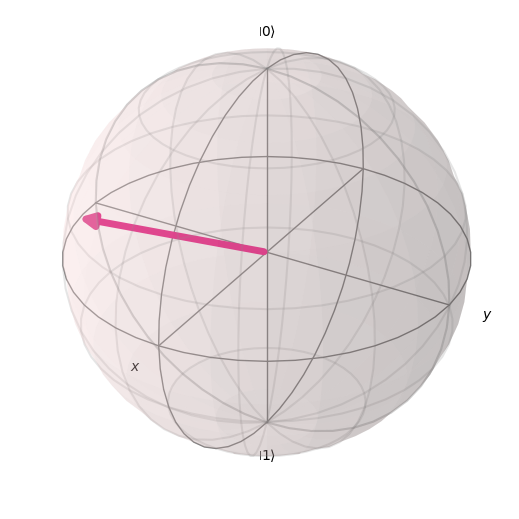

In [108]:
plot_bloch_vector(P)

## Qubit을 더 사용하여 Rotation, Translation에 대한 Qubit 생성

### 2D image의 pixel Q 정의, Bloch Sphere로 Projection

x,y,z =  5 -5 0
k =  0.0741
P =  [ 0.3705 -0.3705  0.8518]
Inner =  3.705
theta =  1.0192955077085448


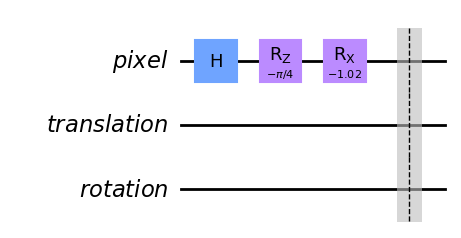

In [292]:
Q = np.array([5,-5,0]) # Given Pixel Coordinate

phi = np.arctan2(Q[1],Q[0])

pixel = QuantumRegister(size=1, name='pixel')
translation = QuantumRegister(size=1, name='translation')
rotation = QuantumRegister(size=1, name = 'rotation')

qc_t = QuantumCircuit(pixel,translation, rotation)
qc_t.h(0)
qc_t.rz(phi,0)

x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
P = project(Q,1,1,1,1)
print("P = ", P)
Inner = Q.dot(P)
print("Inner = ", Inner)
theta =  np.arccos(Inner / (np.sqrt((x**2 + y**2))))
print("theta = ", theta)

if (P[2] > 0) & (P[1] < 0):
    qc_t.rx(-theta, 0)
elif (P[2] > 0) & (P[1] > 0):
    qc_t.rx(+theta, 0)
elif (P[2] < 0) & (P[1] > 0):
    qc_t.rx(-theta, 0)
elif (P[2] < 0) & (P[1] < 0):
    qc_t.rx(+theta, 0)

qc_t.barrier()
qc_t.draw('mpl')

Statevector([0.70227674+0.55492578j, 0.43824351+0.08250682j,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2))


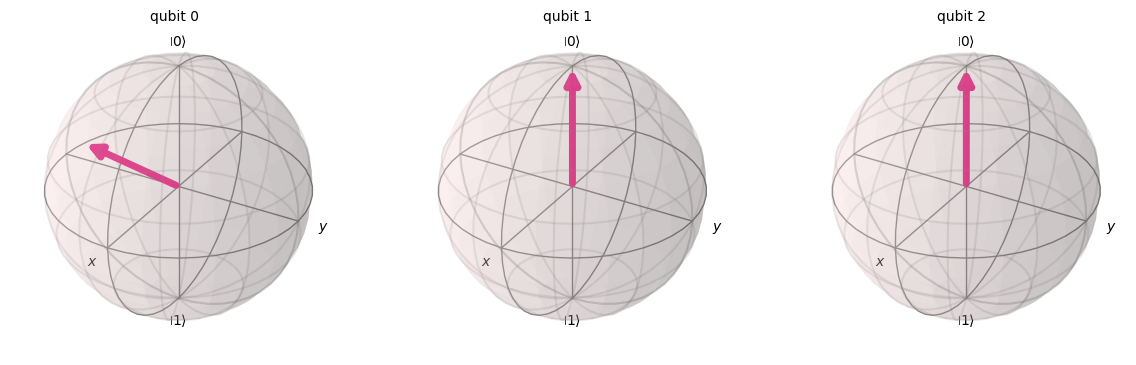

In [293]:
state = Statevector.from_instruction(qc_t)
print(state)
plot_bloch_multivector(state)

### Rotation 함수, Translation 함수 정의

In [288]:
def Rotate(QuantumCircuit, angle):
    QuantumCircuit.x(2)
    QuantumCircuit.crz(angle,2,0)
    QuantumCircuit.barrier()

def Translate(QuantumCircuit, u, v):
    QuantumCircuit.x(1)
    Q_prime = Q + np.array([u,v,0])
    P_prime = project(Q_prime,1,1,1,1)

    theta = abs(arccos(P_prime[2])-arccos(P[2]))
    phi = abs(np.arctan2(P_prime[1],P_prime[0])-np.arctan2(P[1],P[0]))


    if np.arctan2(P_prime[1],P_prime[0]) > np.arctan2(P[1],P[0]):
        QuantumCircuit.crz(phi,1,0)
    elif np.arctan2(P_prime[1],P_prime[0]) < np.arctan2(P[1],P[0]):
        QuantumCircuit.crz(-phi,1,0)
    else:
        pass

    if (P_prime[2]<P[2]) & (P_prime[1]>0):
        QuantumCircuit.crx(-2*theta,1,0)
    elif (P_prime[2]>P[2]) & (P_prime[1]>0):
        QuantumCircuit.crx(2*theta,1,0)

    elif (P_prime[2]<P[2]) & (P_prime[1]<0):
        QuantumCircuit.crx(2*theta,1,0)
    elif (P_prime[2]<P[2]) & (P_prime[1]<0):
        QuantumCircuit.crx(-2*theta,1,0)
    else:
        pass
    QuantumCircuit.barrier()

### Translation 함수가 잘 정의 되었는지 예시를 들어 검증

In [294]:
Translate(qc_t, -7,7)

x,y,z =  -2 2 0
k =  0.3333


Statevector([0.        +0.j        , 0.        +0.j        ,
             0.15627267-0.59813804j, 0.3771351 +0.68962225j,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2))


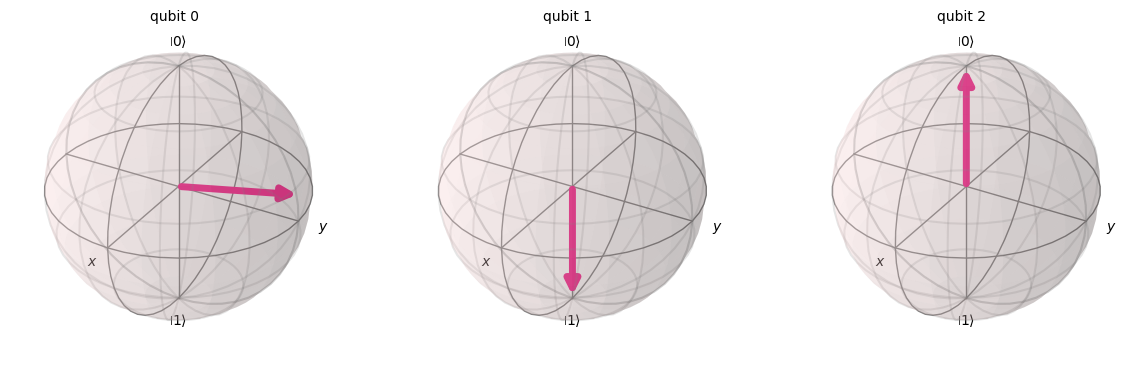

In [295]:
state = Statevector.from_instruction(qc_t)
print(state)
plot_bloch_multivector(state)

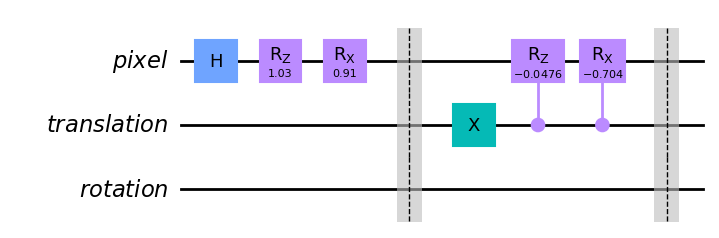

In [291]:
qc_t.draw('mpl')

# RXGate를 이용하여 Backward-Projection을 한 결과 확인, 계산을 통한 결과와 일치하는지 검증

Statevector([ 0.        +0.j        ,  0.        +0.j        ,
              0.69830418-0.57242443j, -0.41512681+0.11122622j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


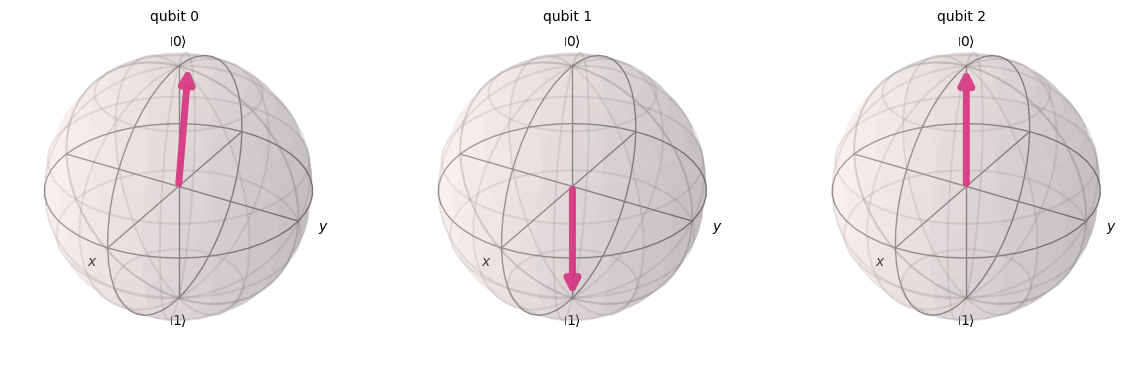

In [278]:
qc_t.rx(2.38,0)
state = Statevector.from_instruction(qc_t)
print(state)
plot_bloch_multivector(state)

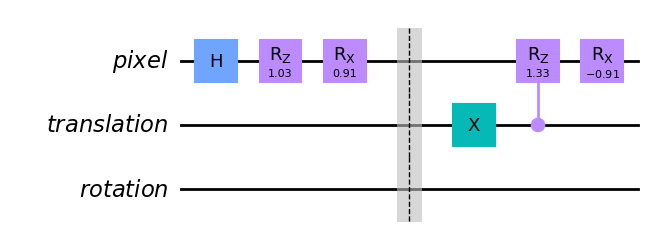

In [254]:
qc_t.draw('mpl')

x,y,z =  -7 2 0
k =  0.0702
P =  [-0.4914  0.1404  0.8596]
Inner =  3.7206
theta =  1.0343744562929797


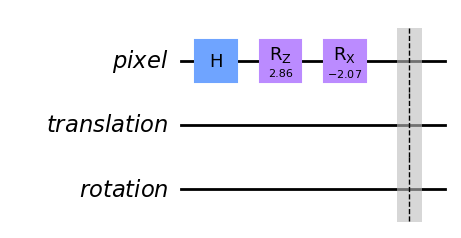

In [64]:
Q_back = np.array([-7,2,0])
phi = np.arctan2(Q_back[1],Q_back[0])

pixel = QuantumRegister(size=1, name='pixel')
translation = QuantumRegister(size=1, name='translation')
rotation = QuantumRegister(size=1, name = 'rotation')

qc_t = QuantumCircuit(pixel,translation, rotation)
qc_t.h(0)
qc_t.rz(phi,0)

x, y = Q_back[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
P_back = project(Q_back,1,1,1,1)
print("P = ", P_back)
Inner = Q_back.dot(P_back)
print("Inner = ", Inner)
theta =  np.arccos(Inner / (np.sqrt((x**2 + y**2))))
print("theta = ", theta)

if P_back[2] > 0:
    qc_t.rx(-2*theta, 0)
else:
    qc_t.rx(+2*theta, 0)

qc_t.barrier()
qc_t.draw('mpl')

Statevector([-0.55179047-0.27358264j,  0.65203722+0.44218466j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2))


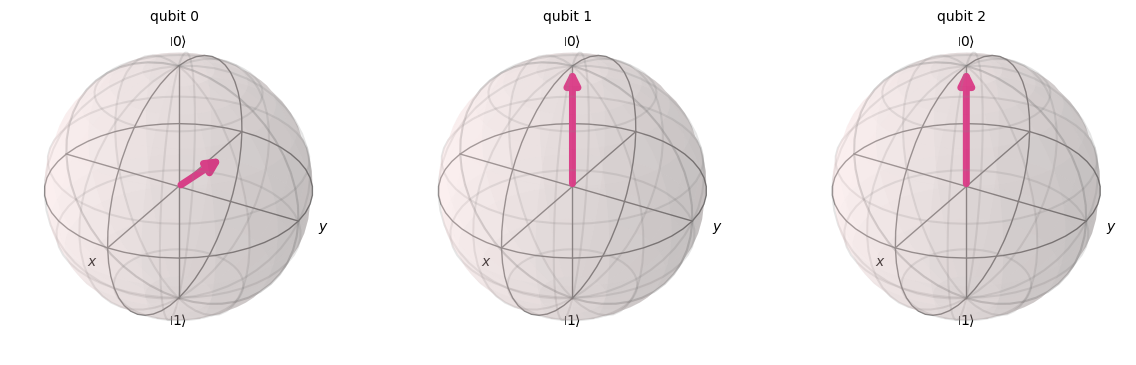

In [65]:
state = Statevector.from_instruction(qc_t)
print(state)
plot_bloch_multivector(state)

0.028571 3.8896000000000006
theta =  1.2307500342836


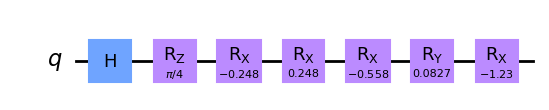

In [135]:
# Classical Computation을 통해 Projection 된 좌표를 구한 다음 theta값 구하기

x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 6)
Inner = Q.dot(P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", theta)
qc.rx(-theta, 0)
qc.draw('mpl')

Statevector([0.55352809-0.08027114j, 0.7025358 +0.44000756j],
            dims=(2,))


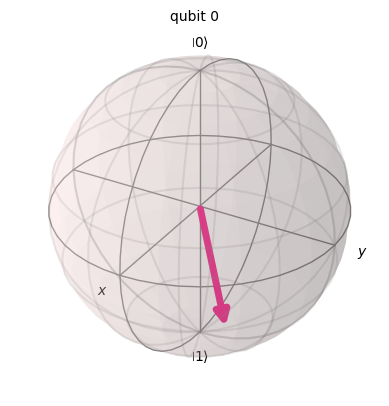

In [55]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

### Q(x,y,0) 에서 Q(x+u,y,0) 로 이동하는 것을 Bloch Sphere 상에서 회전을 통해 구현

In [56]:
# Q는 어차피 Bloch Sphere 상의 P좌표에서 x,y 값과 크기만을 이용할 것이므로 
# x->x+u으로 이동시키면서, y 값은 변하지않는, 쓰지 않을 값인 z 값을 모두 만족시키는 회전인
#Rygate의 각 rho를 구하면 된다.

In [66]:
Q = np.array([7,-10,0])
P = project(Q,1,1,1,1)
x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 4)
print("Q = ", Q, "P = ", P, "k = ", k)

x,y,z =  7 -10 0
k =  0.0261
Q =  [  7 -10   0] P =  [ 0.1827 -0.261   0.9478] k =  0.0261


In [58]:
# Q를 projection한 P를 얼마나 회전하면 
# x -> x+u 만큼 이동한 좌표 Q' 의 projection P' 을 구할 수 있을까?

# Input : P 

def rho(u, P):
    x,y,z = P
    k = (1 - z) / 2
    print("k = ", k)
    print("P = ", P)
    cosplus  = ( (x+u)*x + (1/k-2)*np.sqrt( (1/k-2)**2 - 2 * u * x -u**2) ) / ((1/k-2)**2+x**2)
    cosminus = ( (x+u)*x - (1/k-2)*np.sqrt( (1/k-2)**2 - 2 * u * x -u**2) ) / ((1/k-2)**2+x**2)
    print("cosine plus = ", cosplus,"cosine minus = ", cosminus)
    return np.arccos(cosplus)


In [59]:
rho(3, P)

k =  0.026100000000000012
P =  [ 0.1827 -0.261   0.9478]
cosine plus =  0.9965803299964539 cosine minus =  -0.9956984675265003


0.08272388780349418

In [60]:
def reproject(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)
    x_, y_, z_ = Q[0]
    Q_size = np.sqrt(x_**2 + y_**2)
    x_proj = round((np.cos(phi)*Q_size),4)
    y_proj = round((np.sin(phi)*Q_size),4)
    z_proj = 0
    a = np.cos(theta/2) # 0 state's coefficient
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2) # 1 state's coefficient
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))

    return [x_proj, y_proj, z_proj]

k =  0.026100000000000012
P =  [ 0.1827 -0.261   0.9478]
cosine plus =  0.9965803299964539 cosine minus =  -0.9956984675265003


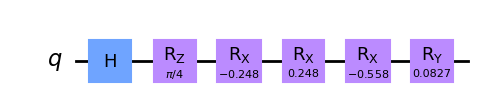

In [61]:
qc.ry(rho(3,P),0)
qc.draw('mpl')

state =  Statevector([0.52400471-0.09839686j, 0.7248234 +0.436312j  ],
            dims=(2,))


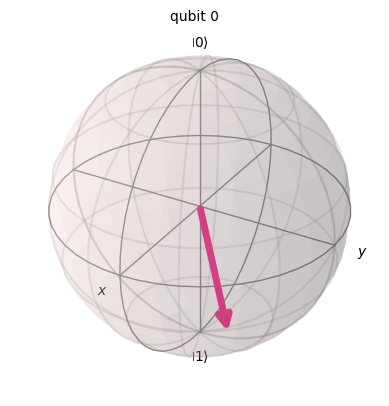

In [62]:
state = Statevector.from_instruction(qc)
print("state = ", state)
plot_bloch_multivector(state)

In [63]:
angle = 0.0827
Ry = np.array([[np.cos(angle),0,np.sin(angle)],
               [0,1,0],
               [-np.sin(angle),0, np.cos(angle)]])
Rotated = Ry.dot(P)

print("Q=", Q, "P=",P,"Rotated P = ", Rotated)

Q= [  7 -10   0] P= [ 0.1827 -0.261   0.9478] Rotated P =  [ 0.26036933 -0.261       0.92946863]


In [64]:
Q_ = np.array([Rotated[0]* Q[1]/Rotated[1], Rotated[1] * Q[1]/Rotated[1],0])
Q_

array([  9.9758364, -10.       ,   0.       ])

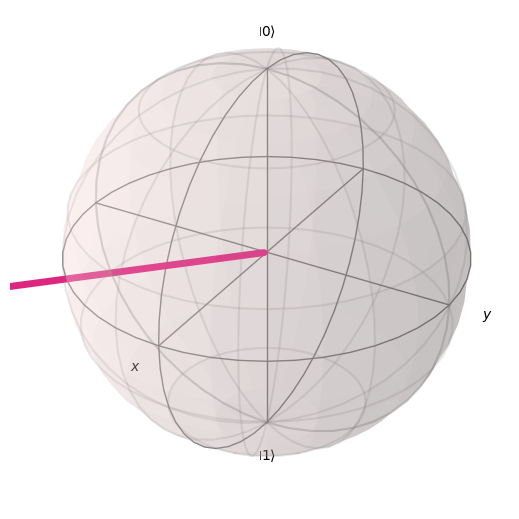

In [65]:
plot_bloch_vector(Q_)

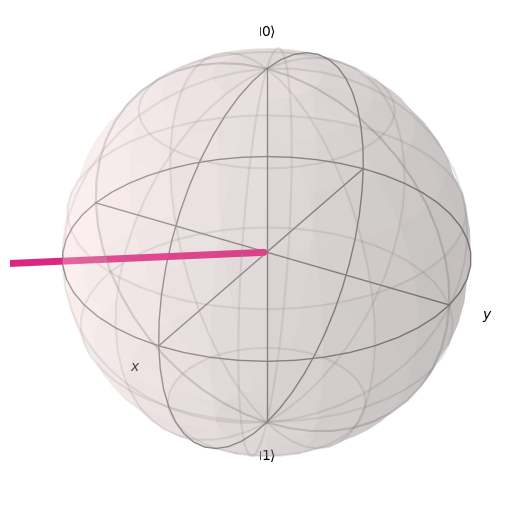

In [66]:
plot_bloch_vector(Q)

## Q(x,y,0)가 $\theta$ 만큼 회전한 경우를 Bloch Sphere 상에서 회전을 통해 구현

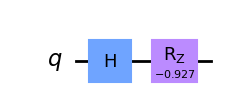

In [67]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector

Q = np.array([3,-4,0])

qc_r = QuantumCircuit(1)
qc_r.h(0)
phi = np.arctan2(Q[1],Q[0])
qc_r.rz(phi,0)
qc_r.draw('mpl')

x,y,z =  3 -4 0
k =  0.1379


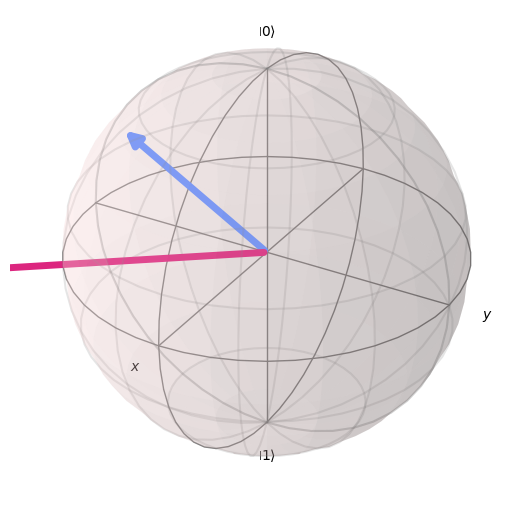

In [68]:
P = project(Q,1,1,1,1)
plot_bloch_vector([Q]+[P])

0.137931 3.4475
theta =  1.619995541542801


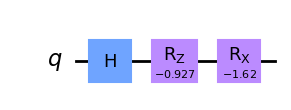

In [69]:
x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 6)
Inner = Q.dot(P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", 2*theta)
qc_r.rx(-2*theta, 0)
qc_r.draw('mpl')

Statevector([0.66511735+0.67611752j, 0.20703889+0.2400394j ],
            dims=(2,))


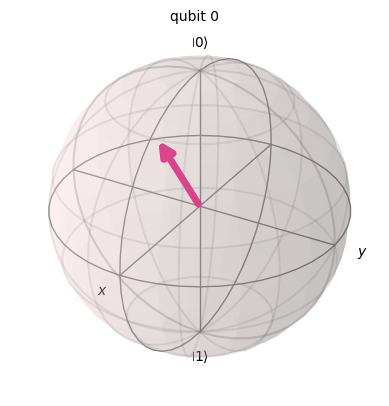

In [71]:
state = Statevector.from_instruction(qc_r)
print(state)
plot_bloch_multivector(state)

Previous state =  Statevector([0.66511735+0.67611752j, 0.20703889+0.2400394j ],
            dims=(2,))
phi =  (2.107128983348271-1.3787889256757342j)
Resized state =  Statevector([0.47030899+0.47808728j, 0.1463986 +0.16973349j],
            dims=(2,))


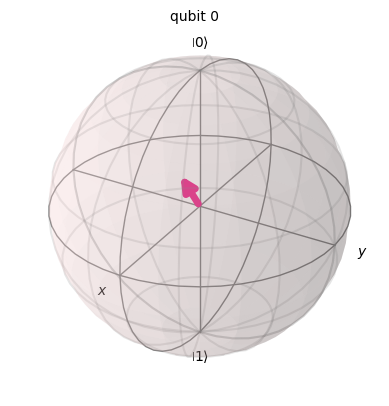

In [72]:
print("Previous state = ", state)

t = 0
for i in range(2):
    t += state[i]

phi_bloch = 2 * np.arccos(np.sqrt(2) * t/2) # Rotation around Z-axis 의 경우 회전 각도의 절반이 exponential의 지수 term으로 들어가므로 마지막에 2배를 해줌.

print("phi = ", phi_bloch )

state = Statevector([state[0]/np.sqrt(2), state[1]/np.sqrt(2)] )

print("Resized state = ", state)

plot_bloch_multivector(state)

In [73]:
x, y = np.real(np.cos(phi_bloch)), np.real(np.sin(phi_bloch)) 
print("(x, y) = ", x, y)
plot_bloch_vector([x,y,0] )
Qixel = np.array([x,y,0])
print(x,y)

(x, y) =  -1.0786869901637748 1.8145800103024592
-1.0786869901637748 1.8145800103024592


### 만약 Q(x,y,0) 을 30도 만큼 회전시키는 경우

#### 2D image를 회전시킨 경우

In [73]:
from math import pi
Q_xy = np.array([[3],
              [-4]])

Rot = np.array([[np.cos(pi/6), -np.sin(pi/6)],
                [np.sin(pi/6),np.cos(pi/6)]])
Q_prime = Rot.dot(Q_xy) 
Q_prime

array([[ 4.59807621],
       [-1.96410162]])

#### Bloch Sphere를 통해 회전시키는경우

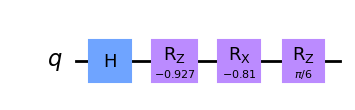

In [74]:
qc_r.rz(pi/6,0)
qc_r.draw('mpl')

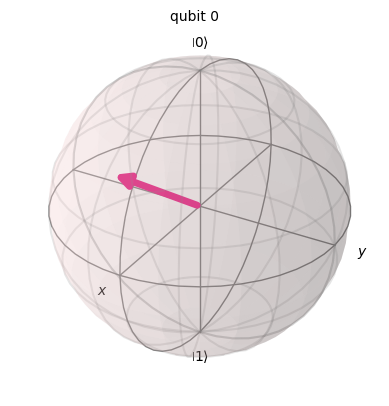

In [75]:
state = Statevector.from_instruction(qc_r)
plot_bloch_multivector(state)

## Time Complexity Analysis

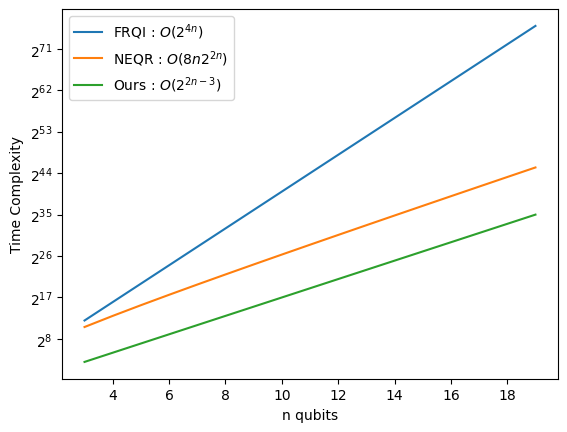

In [76]:
import matplotlib.pyplot as plt

# n qubits can represent 2**n pixels. Thus, Total number of used qubits are 2n qubits.

# Big-O represent of FRQI
n = np.arange(3,20)
n = n.astype(np.float64)
y_frqi = 2**(4*n)

# Big-O represent of NEQR
# Assume q = 1 for initial states.

y_neqr = 8 * n*2**(2*n)

# Big-O represent of Ours

y_ours = 2**(2*n-3)

plt.plot(n, y_frqi, label = 'FRQI : $O(2^{4n})$')
plt.plot(n, y_neqr, label = 'NEQR : $O(8n2^{2n})$')
plt.plot(n, y_ours, label = 'Ours : $O(2^{2n-3})$')
plt.xlabel('n qubits')
plt.ylabel('Time Complexity')
plt.yscale('log', base=2)
plt.legend()

plt.show()